In [1]:
# BATTING AVERAGE - MOOKIE BETTS 

from pybaseball import batting_stats
import pandas as pd 

mookie_betts_stats = pd.DataFrame()

for year in range(2017, 2024):
    # skip 2020 season 
    if year == 2020: 
        continue 
        
    yearly_stats = batting_stats(year)
    
    mookie_yearly_stats = yearly_stats[yearly_stats['Name'] == 'Mookie Betts']
    
    mookie_betts_stats = pd.concat([mookie_betts_stats, mookie_yearly_stats])
    
    mookie_betts_stats.reset_index(drop=True, inplace=True)
    
# Display Mookie Betts' stats from 2017 to 2024
print(mookie_betts_stats)
    

    IDfg  Season          Name Team  Age    G   AB   PA    H   1B  ...  maxEV  \
0  13611    2017  Mookie Betts  BOS   24  153  628  712  166   94  ...  111.7   
1  13611    2018  Mookie Betts  BOS   25  136  520  614  180   96  ...  110.6   
2  13611    2019  Mookie Betts  BOS   26  150  597  706  176  102  ...  109.3   
3  13611    2021  Mookie Betts  LAD   28  122  466  550  123   68  ...  107.9   
4  13611    2022  Mookie Betts  LAD   29  142  572  639  154   76  ...  109.0   
5  13611    2023  Mookie Betts  LAD   30  152  584  693  179   99  ...  110.1   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  
0      209     0.377     554  0.236  0.287  0.273  0.436  0.340    5.3  
1      217     0.500     434  0.220  0.270  0.309  0.606  0.431   10.4  
2      239     0.473     505  0.206  0.257  0.311  0.577  0.411    6.4  
3      159     0.413     385  0.195  0.256  0.263  0.445  0.357    3.9  
4      211     0.447     472  0.173  0.239  0.254  0.465  0.344    

In [2]:
# most recent code 

In [3]:
# batting average - mookie betts 

C:\Users\phily\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


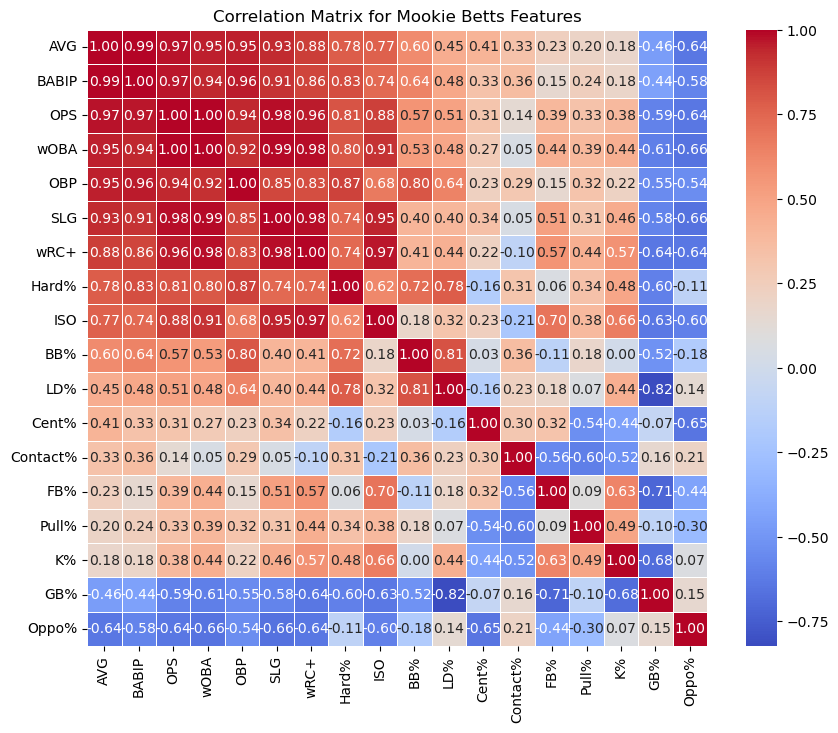

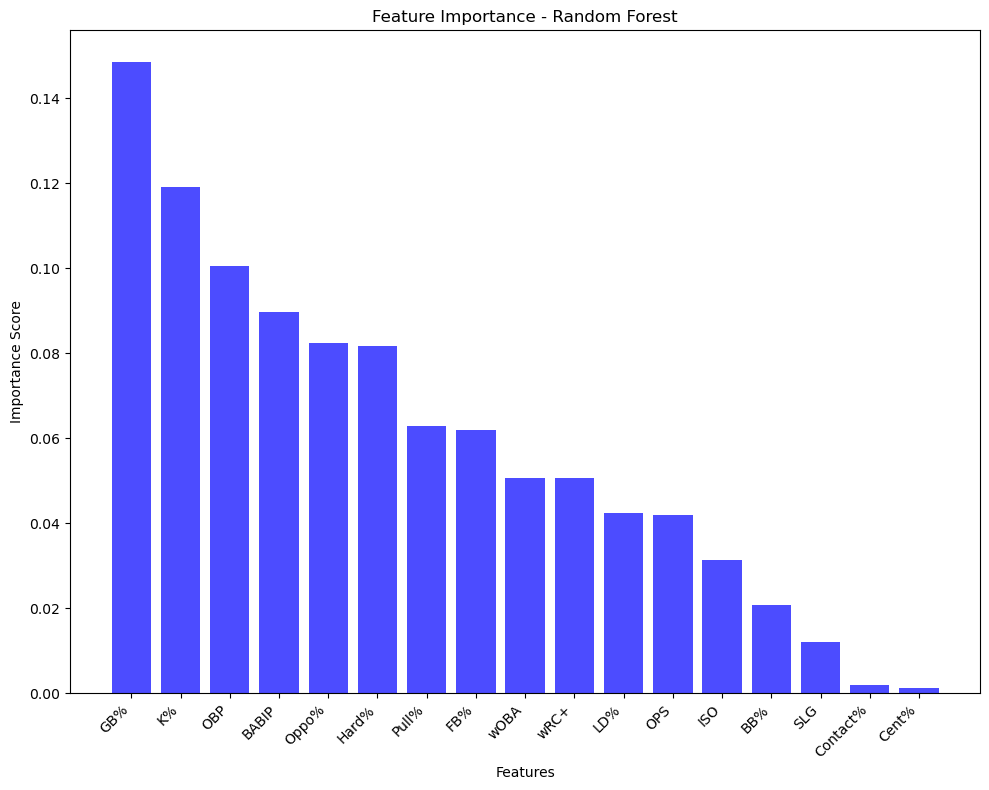

Mean Absolute Error: 0.03236499999999992
R-squared: 0.0766392325996389
Predicted AVG for next season: 0.29778999999999967
Cross-Validation MAE Scores: [0.03382 0.02212]
Mean Cross-Validation MAE: 0.027969999999999724
Cross-Validation R-squared Scores: [-0.53415857 -2.60504296]
Mean Cross-Validation R-squared: -1.5696007648679582


In [4]:
from pybaseball import batting_stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching Mookie Betts' stats
mookie_betts_stats = pd.DataFrame()
for year in range(2017, 2024):
    if year == 2020:  # Skip 2020 season
        continue
    yearly_stats = batting_stats(year)
    mookie_yearly_stats = yearly_stats[yearly_stats['Name'] == 'Mookie Betts']
    mookie_betts_stats = pd.concat([mookie_betts_stats, mookie_yearly_stats])

# Reset index for clean dataframe
mookie_betts_stats.reset_index(drop=True, inplace=True)

# Selected features
features = ['AVG', 'BABIP', 'OPS', 'wOBA', 'OBP', 'SLG', 'wRC+', 'Hard%', 'ISO', 'BB%', 'LD%', 'Cent%', 'Contact%', 'FB%', 'Pull%', 'K%', 'GB%', 'Oppo%']

# Dropping rows with missing values for selected features
mookie_data = mookie_betts_stats.dropna(subset=features)

# Preparing data for Random Forest regression
X = mookie_data[features[1:]]  # Exclude 'AVG' from features
y = mookie_data['AVG']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(max_depth=3, min_samples_leaf=1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Predicting next season's AVG based on the most recent stats
latest_stats = X.iloc[-1].values.reshape(1, -1)  # Get the last available row
next_season_prediction = model.predict(latest_stats)[0]

# Metrics
# mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Correlation heatmap
correlation_matrix = mookie_data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Mookie Betts Features')
plt.show()

# Feature importance
importances = model.feature_importances_
indices = importances.argsort()[::-1]  # Sort by importance (descending)
sorted_features = X.columns[indices]
sorted_importances = importances[indices]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.bar(sorted_features, sorted_importances, color='blue', alpha=0.7)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import numpy as np

# Define cross-validation strategy
kf = KFold(n_splits=2, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define MAE scoring
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negated for minimization

# Perform cross-validation for MAE
cv_mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
cv_mae_scores = -cv_mae_scores  # Convert back to positive

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Displaying results
# print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r_squared}")
print(f"Predicted AVG for next season: {next_season_prediction}")

# Display cross-validation results
print("Cross-Validation MAE Scores:", cv_mae_scores)
print(f"Mean Cross-Validation MAE: {np.mean(cv_mae_scores)}")
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print(f"Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}")



In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import numpy as np

# Define cross-validation strategy
kf = KFold(n_splits=2, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define MAE scoring
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negated for minimization

# Perform cross-validation for MAE
cv_mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
cv_mae_scores = -cv_mae_scores  # Convert back to positive

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Display cross-validation results
print("Cross-Validation MAE Scores:", cv_mae_scores)
print(f"Mean Cross-Validation MAE: {np.mean(cv_mae_scores)}")
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print(f"Mean Cross-Validation R-squared: {np.mean(cv_r2_scores)}")


Cross-Validation MAE Scores: [0.03382 0.02212]
Mean Cross-Validation MAE: 0.027969999999999724
Cross-Validation R-squared Scores: [-0.53415857 -2.60504296]
Mean Cross-Validation R-squared: -1.5696007648679582


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=2, scoring='r2')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [7]:
# pitching ERA - Jack Flaherty

Data Preview:
    Season  Age Team  Lg  WAR   W  L   W-L%   ERA   G  ...   SO9  SO/BB   LD%  \
0    2017   21  STL  NL -0.3   0  2  0.000  6.33   6  ...   8.4   2.00  25.4   
1    2018   22  STL  NL  3.2   8  9  0.471  3.34  28  ...  10.8   3.08  23.7   
2    2019   23  STL  NL  5.8  11  8  0.579  2.75  33  ...  10.6   4.20  24.6   
3    2021   25  STL  NL  0.8   9  2  0.818  3.22  17  ...   9.8   3.27  25.9   
4    2022   26  STL  NL -0.1   2  1  0.667  4.25   9  ...   8.3   1.50  27.1   
5    2023   27  STL  NL  1.4   7  6  0.538  4.43  20  ...   8.7   1.96  25.6   
6    2023   27  BAL  AL -0.6   1  3  0.250  6.75   9  ...  10.9   3.50  34.6   

    GB%   FB%     BA    OBP    SLG    OPS  BAbip  
0  49.2  25.4  0.284  0.362  0.481  0.843  0.322  
1  42.1  23.4  0.199  0.290  0.345  0.635  0.258  
2  39.5  23.0  0.192  0.256  0.335  0.591  0.244  
3  39.0  29.3  0.199  0.278  0.364  0.642  0.236  
4  41.1  23.4  0.259  0.380  0.424  0.804  0.314  
5  45.3  23.7  0.287  0.370  0.450  0.

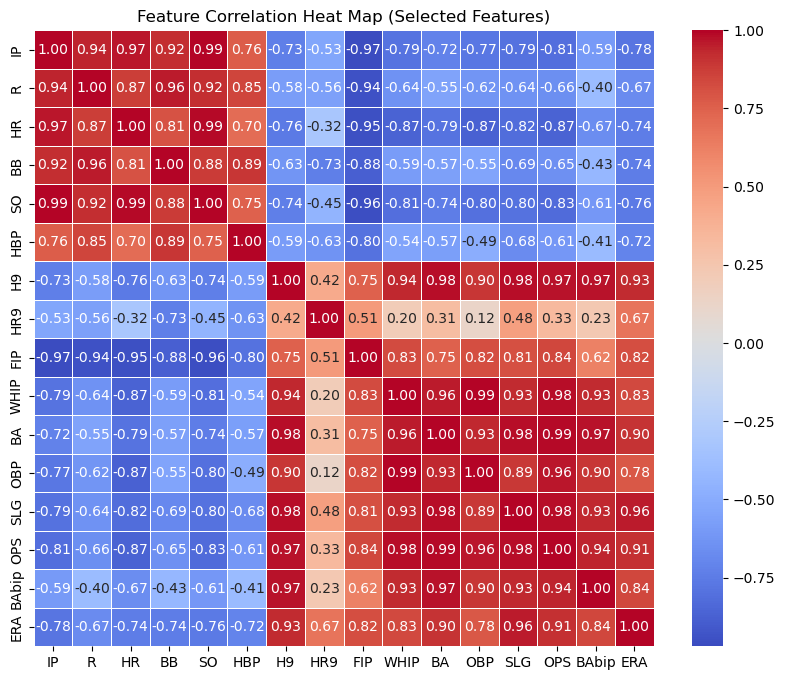

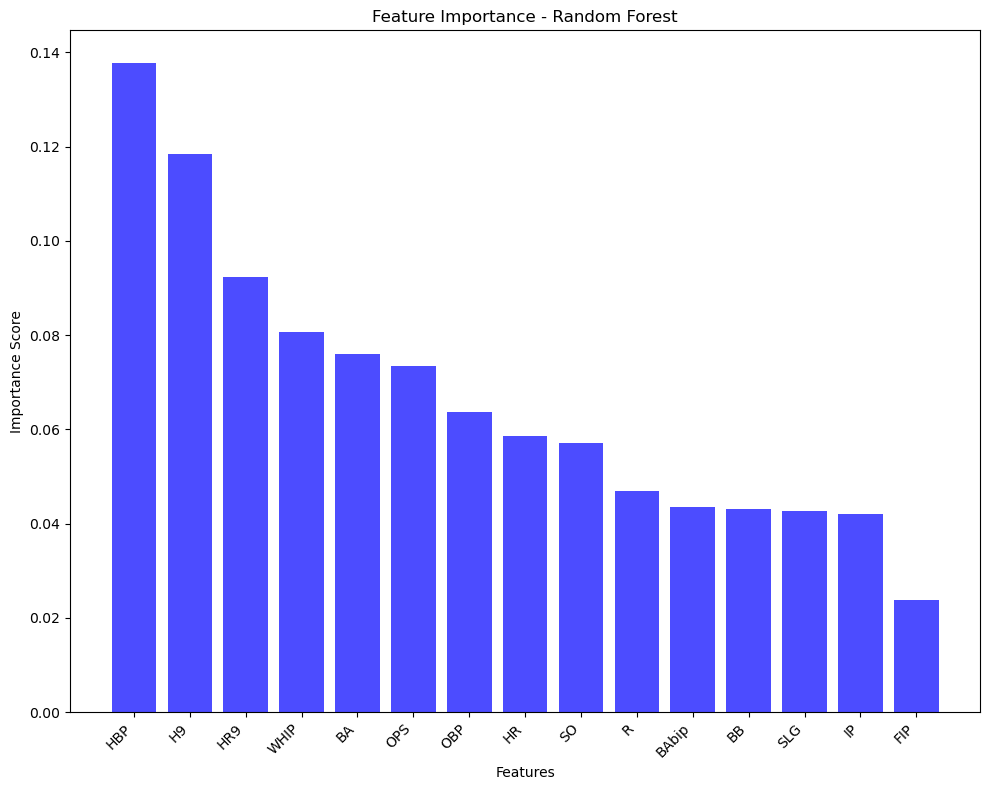

Mean Absolute Error (MAE): 0.6577999999999999
R-squared Value: 0.6566128790505701


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('jack_flaherty.csv')  # Replace with your data file
print("Data Preview:\n", data)

# Define features and target variable
features = ['IP', 'H', 'R', 'HR', 'BB', 'SO', 'HBP', 'H9', 'HR9', 'BB9', 'SO9', 'FIP', 'WHIP', 'BA', 'OBP', 'SLG', 'OPS', 'BAbip']
target = 'ERA'

# Drop rows with missing values
data = data.dropna(subset=features + [target])

# Perform feature selection to identify the most predictive features
k_best = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_selected = k_best.fit_transform(data[features], data[target])
selected_features = np.array(features)[k_best.get_support()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, data[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a correlation matrix
corr_matrix = data[selected_features.tolist() + [target]].corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heat Map (Selected Features)')
plt.show()

# Extract feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance (descending)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(selected_features)), importances[indices], align="center", color="blue", alpha=0.7)
plt.xticks(range(len(selected_features)), selected_features[indices], rotation=45, ha="right")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
print("R-squared Value:", r2)


In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_model)

RandomForestRegressor(n_estimators=50, random_state=42)


In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Define cross-validation strategy
kf = KFold(n_splits=2, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Negative for minimization

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X_selected, data[target], cv=kf, scoring='r2')

# Perform cross-validation for MAE
cv_mae_scores = cross_val_score(model, X_selected, data[target], cv=kf, scoring=mae_scorer)

# Display cross-validation results
print("Cross-validated R-squared scores:", cv_r2_scores)
print(f"Average R-squared: {np.mean(cv_r2_scores)}")
print("Cross-validated MAE scores (negative):", cv_mae_scores)
print(f"Average MAE: {-np.mean(cv_mae_scores)}")  # Convert back to positive


Cross-validated R-squared scores: [0.66037988 0.5172681 ]
Average R-squared: 0.5888239933616026
Cross-validated MAE scores (negative): [-0.7115     -1.02646667]
Average MAE: 0.8689833333333339


In [11]:
# Get the most recent stats (last row of the dataset)
latest_stats = data[features].iloc[-1].values.reshape(1, -1)

# Select the most predictive features from the most recent stats
latest_stats_selected = k_best.transform(latest_stats)

# Predict the ERA for the next season
next_season_era = model.predict(latest_stats_selected)[0]
print(f"Predicted ERA for the next season: {next_season_era}")


Predicted ERA for the next season: 5.9546


C:\Users\phily\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
